# CSCI 183 Final Project


In [157]:
import pandas as pd

# Import the initial data 
fire_csv = pd.read_csv("FW_Veg_Rem_Combined.csv")

fire_df = pd.DataFrame(fire_csv)
del fire_df['Unnamed: 0.1']
del fire_df['Unnamed: 0']
fire_df



,fire_name,fire_size,fire_size_class,stat_cause_descr,latitude,longitude,state,disc_clean_date,cont_clean_date,discovery_month,...,Wind_cont,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,remoteness
0,NaN,10.0,C,Missing/Undefined,18.105072,-66.753044,PR,2/11/2007,NaN,Feb,...,3.250413,78.216590,76.793750,76.381579,78.724370,0.0,0.0,0.0,0.0,0.017923
1,NaN,3.0,B,Arson,35.038330,-87.610000,TN,12/11/2006,NaN,Dec,...,2.122320,70.840000,65.858911,55.505882,81.682678,59.8,8.4,0.0,86.8,0.184355
2,NaN,60.0,C,Arson,34.947800,-88.722500,MS,2/29/2004,NaN,Feb,...,3.369050,75.531629,75.868613,76.812834,65.063800,168.8,42.2,18.1,124.5,0.194544
3,WNA 1,1.0,B,Debris Burning,39.641400,-119.308300,NV,6/6/2005,6/6/2005,Jun,...,0.000000,44.778429,37.140811,35.353846,0.000000,10.4,7.2,0.0,0.0,0.487447
4,NaN,2.0,B,Miscellaneous,30.700600,-90.591400,LA,9/22/1999,NaN,Sep,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,0.214633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55362,IMPACT,6289.0,G,Missing/Undefined,39.180000,-96.784167,KS,10/15/2015,NaN,Oct,...,3.804803,65.671410,61.839572,54.625698,55.042092,35.4,8.2,0.0,249.0,0.331501
55363,BUTTE,70868.0,G,Missing/Undefined,38.342719,-120.695967,CA,9/9/2015,10/1/2015,Sep,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,0.124683
55364,WILLOW,5702.0,G,Arson,37.262607,-119.511139,CA,7/25/2015,NaN,Jul,...,2.529158,43.755556,43.755556,44.443975,35.924406,0.0,0.0,0.0,0.0,0.097682
55365,BARKER,3261.0,F,Miscellaneous,40.604300,-123.080450,CA,7/31/2015,9/12/2015,Jul,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,0.178206


| Term List | Description |
| :- | :- |
| fire_mag: | magnitude of fire intensity (scaled version of fire_size) | 
| Temp_pre_30: | temperature in deg C at the location of fire upto 30 days prior |
| Temp_pre_15: | temperature in deg C at the location of fire upto 15 days prior |
| Temp_pre_7:  | temperature in deg C at the location of fire upto 7 days prior  |
| Temp_cont:   | temperature in deg C at the location of fire upto day the fire was contained|
| Wind_pre_30: | wind in m/s at the location of fire upto 30 days prior |
| Wind_pre_15: | wind in m/s at the location of fire upto 15 days prior |
| Wind_pre_7:  | wind in m/s at the location of fire upto 7 days prior  |
| Wind_cont:   | wind in m/s at the location of fire upto day the fire was contained |
| Hum_pre_30:  | humidity in % at the location of fire upto 30 days prior |
| Hum_pre_15:  | humidity in % at the location of fire upto 15 days prior |
| Hum_pre_7:   | humidity in % at the location of fire upto 7 days prior |
| Hum_cont:    | humidity in % at the location of fire upto day the fire was contained |
| Prec_pre_30: | precipitation in mm at the location of fire upto 30 days prior |
| Prec_pre_15: | precipitation in mm at the location of fire upto 15 days prior |
| Prec_pre_7:  | precipitation in mm at the location of fire upto 7 days prior  |
| Prec_cont:   | precipitation in mm at the location of fire upto day the fire was contained |
| remoteness:  | non-dimensional distance to closest city |


In [158]:
# Begin preprocessing 

# Check the NaN values in the data frame for each column. If there are NaN values, save the column names so we can go back and see if those columns are necessary
non_needed_columns = []
for column in fire_df: 
    print(column, "has ", fire_df[column].isna().sum(), " NaN values")
    if fire_df[column].isna().sum() > 0: 
        non_needed_columns.append(column)

print()
print(non_needed_columns)

fire_name has  29454  NaN values
fire_size has  0  NaN values
fire_size_class has  0  NaN values
stat_cause_descr has  0  NaN values
latitude has  0  NaN values
longitude has  0  NaN values
state has  0  NaN values
disc_clean_date has  0  NaN values
cont_clean_date has  27890  NaN values
discovery_month has  0  NaN values
disc_date_final has  26659  NaN values
cont_date_final has  29735  NaN values
putout_time has  27890  NaN values
disc_date_pre has  0  NaN values
disc_pre_year has  0  NaN values
disc_pre_month has  0  NaN values
wstation_usaf has  0  NaN values
dstation_m has  0  NaN values
wstation_wban has  0  NaN values
wstation_byear has  0  NaN values
wstation_eyear has  0  NaN values
Vegetation has  0  NaN values
fire_mag has  0  NaN values
weather_file has  0  NaN values
Temp_pre_30 has  0  NaN values
Temp_pre_15 has  0  NaN values
Temp_pre_7 has  0  NaN values
Temp_cont has  0  NaN values
Wind_pre_30 has  0  NaN values
Wind_pre_15 has  0  NaN values
Wind_pre_7 has  0  NaN val

In [159]:
# After looking at the columns that have NaN values, we realized that features such as "putout time" and "contained data" and more were not needed in our analysis so we could simply
# delete those columns as they would not be necessary to the project. 

for value in non_needed_columns: 
    del fire_df[value] 


In [169]:
# We noticed some of the weather data wasn't found and had -1 values for the weather data. This line of code gets rid of those

fire_df.drop(fire_df.loc[fire_df['weather_file']=='File Not Found'].index, inplace=True)

In [170]:
fire_df

,fire_size,fire_size_class,stat_cause_descr,latitude,longitude,state,disc_clean_date,discovery_month,disc_date_pre,disc_pre_year,...,Wind_cont,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,remoteness
0,10.0,C,Missing/Undefined,18.105072,-66.753044,PR,2/11/2007,Feb,1/12/2007,2007,...,3.250413,78.216590,76.793750,76.381579,78.724370,0.0,0.0,0.0,0.0,0.017923
1,3.0,B,Arson,35.038330,-87.610000,TN,12/11/2006,Dec,11/11/2006,2006,...,2.122320,70.840000,65.858911,55.505882,81.682678,59.8,8.4,0.0,86.8,0.184355
2,60.0,C,Arson,34.947800,-88.722500,MS,2/29/2004,Feb,1/30/2004,2004,...,3.369050,75.531629,75.868613,76.812834,65.063800,168.8,42.2,18.1,124.5,0.194544
3,1.0,B,Debris Burning,39.641400,-119.308300,NV,6/6/2005,Jun,5/7/2005,2005,...,0.000000,44.778429,37.140811,35.353846,0.000000,10.4,7.2,0.0,0.0,0.487447
6,5.2,B,Debris Burning,31.316978,-83.393649,GA,1/10/2009,Jan,12/11/2008,2008,...,0.000000,79.896679,73.431818,0.000000,0.000000,26.0,0.0,0.0,0.0,0.148904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55360,3500.0,F,Missing/Undefined,37.606667,-96.422500,KS,2/12/2015,Feb,1/13/2015,2015,...,4.559206,62.971774,69.376658,68.118919,64.008028,20.1,18.8,0.0,3.8,0.365622
55361,11699.0,G,Missing/Undefined,40.394700,-104.564600,CO,9/18/2015,Sep,8/19/2015,2015,...,2.744039,51.010341,50.264501,48.204861,57.236620,4.6,0.0,0.0,4.8,0.199532
55362,6289.0,G,Missing/Undefined,39.180000,-96.784167,KS,10/15/2015,Oct,9/15/2015,2015,...,3.804803,65.671410,61.839572,54.625698,55.042092,35.4,8.2,0.0,249.0,0.331501
55364,5702.0,G,Arson,37.262607,-119.511139,CA,7/25/2015,Jul,6/25/2015,2015,...,2.529158,43.755556,43.755556,44.443975,35.924406,0.0,0.0,0.0,0.0,0.097682


In [ ]:
# Find unique causes for fires: 
def checkCause(data_frame):
    cause_list = {}
    for value in data_frame['stat_cause_descr']:
        if value not in cause_list.keys():
            cause_list[value] = 0

    for value in data_frame['stat_cause_descr']:
        if cause_list[value] == 0:
            cause_list[value] = 1
        else:
            cause_list[value] += 1
    return cause_list

cause_list_ = checkCause(fire_df)
cause_list_

{'Missing/Undefined': 5063,
 'Arson': 9724,
 'Debris Burning': 14278,
 'Miscellaneous': 8344,
 'Campfire': 1367,
 'Fireworks': 223,
 'Children': 1280,
 'Lightning': 8218,
 'Equipment Use': 4107,
 'Smoking': 1181,
 'Railroad': 1021,
 'Structure': 78,
 'Powerline': 483}

In [ ]:
counter = 0
lightning_df = pd.DataFrame()
for value in fire_df['stat_cause_descr']:
    if value == 'Lightning':
        lightning_df = pd.concat([lightning_df, fire_df.iloc[[counter]]])
    counter +=1
lightning_df

,fire_size,fire_size_class,stat_cause_descr,latitude,longitude,state,disc_clean_date,discovery_month,disc_date_pre,disc_pre_year,...,Wind_cont,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,remoteness
36,1420.0,F,Lightning,33.241800,-104.912200,NM,7/2/1994,Jul,6/2/1994,1994,...,4.217647,28.783203,25.789062,18.208333,17.058824,2.5,0.0,0.0,0.0,0.347991
40,5.0,B,Lightning,40.834700,-112.806400,UT,8/14/2006,Aug,7/15/2006,2006,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,0.421384
64,1.5,B,Lightning,39.205000,-105.188333,CO,7/31/1996,Jul,7/1/1996,1996,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.347203
79,2.5,B,Lightning,42.364444,-112.232222,ID,7/25/2006,Jul,6/25/2006,2006,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,0.415065
84,108.0,D,Lightning,63.851700,-150.354300,AK,7/1/1997,Jul,6/1/1997,1997,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.819727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55330,9211.0,G,Lightning,44.237000,-118.992700,OR,8/12/2015,Aug,7/13/2015,2015,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,0.116873
55331,3082.0,F,Lightning,48.383600,-117.891900,WA,8/14/2015,Aug,7/15/2015,2015,...,2.918241,37.301713,36.085561,40.526012,49.762009,2.0,2.0,2.0,9.2,0.124757
55332,5200.0,G,Lightning,30.865978,-94.803980,TX,8/17/2015,Aug,7/18/2015,2015,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,0.516698
55356,4336.0,F,Lightning,34.316000,-112.268300,AZ,8/2/2015,Aug,7/3/2015,2015,...,3.193614,45.053836,46.349030,40.786982,49.818887,86.9,78.8,6.9,41.0,0.192487


In [ ]:
# See how many different types of vegitation there is 
Vegetation_desc = {1: 'Tropical Evergreen Broadleaf Forest', 2: 'Tropical Deciduous Broadleaf Forest', 3: 'Temperate Evergreen Broadleaf Forest', 4: 'Temperate Evergreen Needleleaf Forest TmpENF',
                    5: 'Temperate Deciduous Broadleaf Forest', 6: 'Boreal Evergreen Needleleaf Forest', 7: 'Boreal Deciduous Needleleaf Forest', 8: 'Savanna', 9: 'C3 Grassland/Steppe', 10: 'C4 Grassland/Steppe',
                     11: 'Dense Shrubland', 12: 'Open Shrubland', 13: 'Tundra Tundra', 14: 'Desert', 15:' Polar Desert/Rock/Ice', 16: 'Secondary Tropical Evergreen Broadleaf Forest', 
                     17: 'Secondary Tropical Deciduous Broadleaf Forest', 18: 'Secondary Temperate Evergreen Broadleaf Forest', 19: 'Secondary Temperate Evergreen Needleleaf Forest', 
                     20: 'Secondary Temperate Deciduous Broadleaf Forest', 21: 'Secondary Boreal Evergreen Needleleaf Forest', 22: 'Secondary Boreal Deciduous Needleleaf Forest', 23: 'Water/Rivers Water', 
                     24: 'C3 Cropland', 25: 'C4 Cropland', 26: 'C3 Pastureland', 27: 'C4 Pastureland', 28: 'Urban land'}
vegetation_dict = {}
for i in lightning_df['Vegetation']:
    vegetation_dict[i] = 0

for i in lightning_df['Vegetation']:
    if vegetation_dict[i] == 0:
        vegetation_dict[i] = 1
    else: 
        vegetation_dict[i] +=1

for i in vegetation_dict:
    if i in Vegetation_desc:
        print('Amount of ',Vegetation_desc[i], '= ', vegetation_dict[i])
    else: 
        print('Class ', i, 'is not in the description list')

Amount of  Secondary Tropical Evergreen Broadleaf Forest =  934
Amount of   Polar Desert/Rock/Ice =  2161
Class  0 is not in the description list
Amount of  C3 Grassland/Steppe =  1089
Amount of  Open Shrubland =  1699
Amount of  Desert =  180
Amount of  Temperate Evergreen Needleleaf Forest TmpENF =  259


__________________________________________________________________________________________________

In [ ]:
# Look specifically at the California fires
ca_rows = pd.DataFrame()
counter = 0
for value in fire_df['state']:
    if value == 'CA':
        ca_rows = pd.concat([ca_rows, fire_df.iloc[[counter]]])
    counter+=1

In [ ]:
# Check the causes for just the california fires. 
ca_causes = checkCause(ca_rows)
ca_causes

{'Equipment Use': 919,
 'Arson': 421,
 'Lightning': 478,
 'Miscellaneous': 1079,
 'Missing/Undefined': 303,
 'Smoking': 76,
 'Debris Burning': 296,
 'Children': 121,
 'Campfire': 90,
 'Structure': 5,
 'Fireworks': 8,
 'Powerline': 36,
 'Railroad': 15}

In [ ]:
len(ca_rows)

3847

__________________________________________________________________________________________________

<AxesSubplot:>

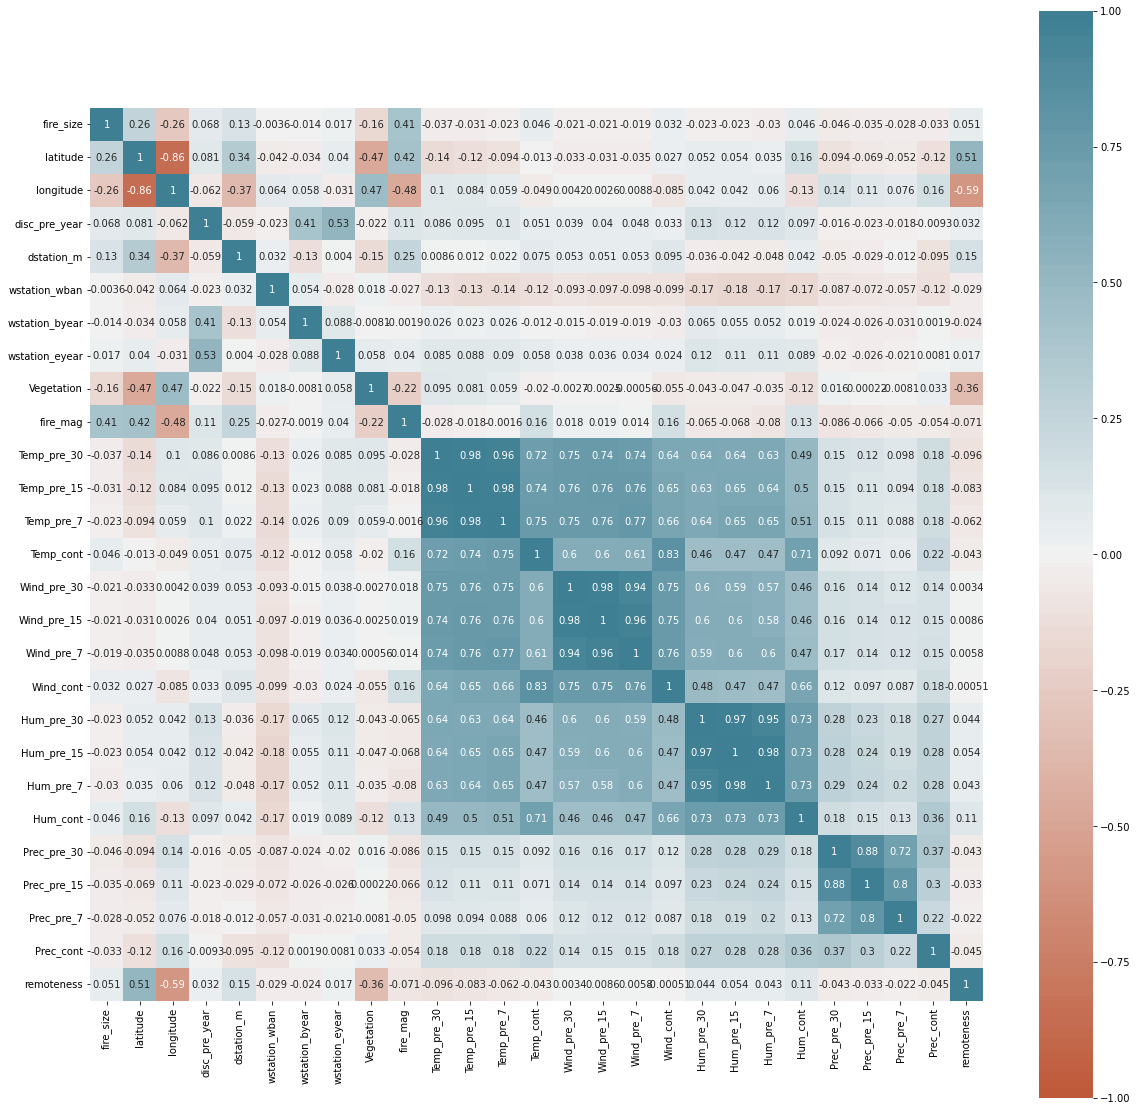

In [ ]:
#Look at correlations on all of the fires

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

californiaFire = lightning_df.corr()
#visualize the data to see where the correlations exist
plt.subplots(figsize=(20,20))
sns.heatmap(
    californiaFire,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(22, 220, n=150),
    annot=True, annot_kws={'size': 10},
    square=True
)

In [ ]:
#Print the unique correlation. For example, wind 10 days before is highly correlated with wind 5 days before. Don't look at this correlation. 
temp_array = {}
temp_list = []
for line in californiaFire: 
    temp_array[line] = []

def rArray(t_list, t_array, corr):
    for i in corr: #go through correlation matrix by column
        for j in corr: #go through correlation matrix by row
            value = corr[i][j] #set the cell value to value
            if  value > .99999: #if the value is 1 or greater
                break
            elif value > 0.70 or value < -0.70: #if the value would represent a correlation
                t_list.append(value) #put the value in the array of r-values
                t_array[j].append(i) #note the correlation in the dictionary        
    return t_list
    return t_array

def corrObserve(t_array, t_list):
    n = 0
    for i in t_array: #access the dictionary
        if t_array[i] != []: #if the dictionary is not empty
            for j in t_array[i]: #go through each value per key
                if i[0] != j[0]:
                    if t_list[n] < 1 and t_list[n] > 0: #if the corresponding value in the correlation array is positive:
                        print("\u0332".join(i), " has a strong, positive correlation to", "\u0332".join(j), "with an r value of: ", t_list[n]) #print the relation and the r value
                        print()
                    elif t_list[n] > -1 and t_list[n] < 0: #if the corresponding value in the correlation array is negative:
                        print(i," has a strong, negative correlation to ", j, " with an r value of: ", t_list[n]) #print the relation and the r value
                        print()
                    n += 1

rArray(temp_list, temp_array, californiaFire)
corrObserve(temp_array, temp_list)    
        

    

Temp_pre_30  has a strong, negative correlation to  Wind_pre_30  with an r value of:  -0.8582410817934584

T̲e̲m̲p̲_̲p̲r̲e̲_̲3̲0  has a strong, positive correlation to W̲i̲n̲d̲_̲p̲r̲e̲_̲1̲5 with an r value of:  0.98194915257385

T̲e̲m̲p̲_̲p̲r̲e̲_̲3̲0  has a strong, positive correlation to W̲i̲n̲d̲_̲p̲r̲e̲_̲7 with an r value of:  0.9584925055895708

T̲e̲m̲p̲_̲p̲r̲e̲_̲1̲5  has a strong, positive correlation to W̲i̲n̲d̲_̲p̲r̲e̲_̲3̲0 with an r value of:  0.980352858968295

T̲e̲m̲p̲_̲p̲r̲e̲_̲1̲5  has a strong, positive correlation to W̲i̲n̲d̲_̲p̲r̲e̲_̲1̲5 with an r value of:  0.7244614296127273

T̲e̲m̲p̲_̲p̲r̲e̲_̲1̲5  has a strong, positive correlation to W̲i̲n̲d̲_̲p̲r̲e̲_̲7 with an r value of:  0.7360435680681554

T̲e̲m̲p̲_̲p̲r̲e̲_̲7  has a strong, positive correlation to W̲i̲n̲d̲_̲p̲r̲e̲_̲3̲0 with an r value of:  0.7451104298833788

T̲e̲m̲p̲_̲p̲r̲e̲_̲7  has a strong, positive correlation to W̲i̲n̲d̲_̲p̲r̲e̲_̲1̲5 with an r value of:  0.7535007915069618

T̲e̲m̲p̲_̲p̲r̲e̲_̲7  has a strong, p

{'fire_size': [], 'latitude': ['longitude'], 'longitude': [], 'disc_pre_year': [], 'dstation_m': [], 'wstation_wban': [], 'wstation_byear': [], 'wstation_eyear': [], 'Vegetation': [], 'fire_mag': [], 'Temp_pre_30': ['Temp_pre_15', 'Temp_pre_7', 'Temp_cont', 'Wind_pre_30', 'Wind_pre_15', 'Wind_pre_7'], 'Temp_pre_15': ['Temp_pre_7', 'Temp_cont', 'Wind_pre_30', 'Wind_pre_15', 'Wind_pre_7'], 'Temp_pre_7': ['Temp_cont', 'Wind_pre_30', 'Wind_pre_15', 'Wind_pre_7'], 'Temp_cont': ['Wind_cont', 'Hum_cont'], 'Wind_pre_30': ['Wind_pre_15', 'Wind_pre_7', 'Wind_cont'], 'Wind_pre_15': ['Wind_pre_7', 'Wind_cont'], 'Wind_pre_7': ['Wind_cont'], 'Wind_cont': [], 'Hum_pre_30': ['Hum_pre_15', 'Hum_pre_7', 'Hum_cont'], 'Hum_pre_15': ['Hum_pre_7', 'Hum_cont'], 'Hum_pre_7': ['Hum_cont'], 'Hum_cont': [], 'Prec_pre_30': ['Prec_pre_15', 'Prec_pre_7'], 'Prec_pre_15': ['Prec_pre_7'], 'Prec_pre_7': [], 'Prec_cont': [], 'remoteness': []}


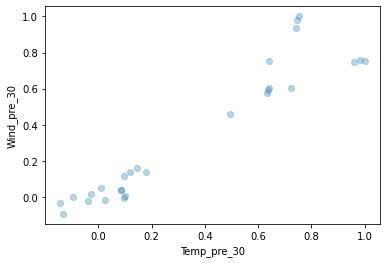

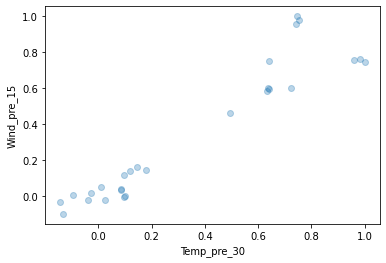

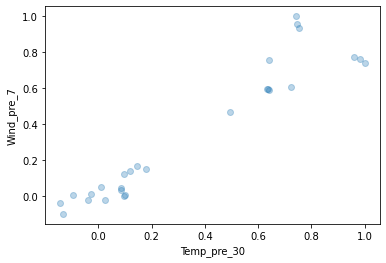

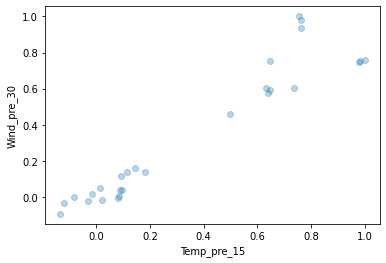

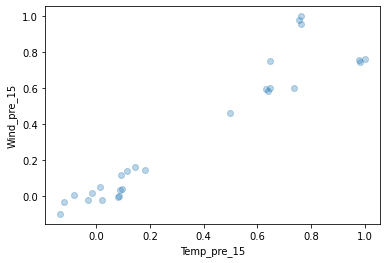

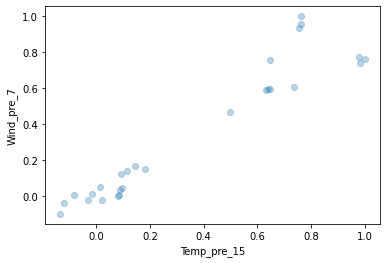

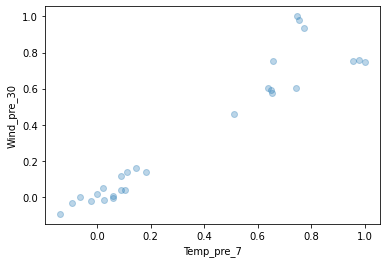

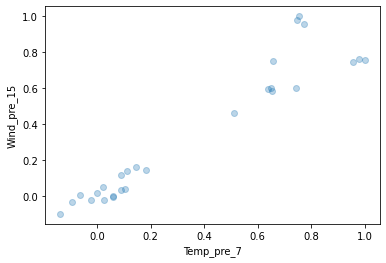

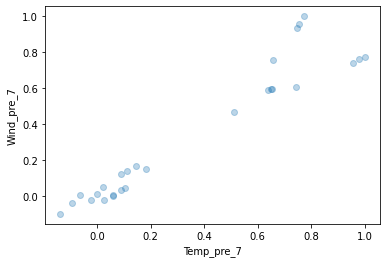

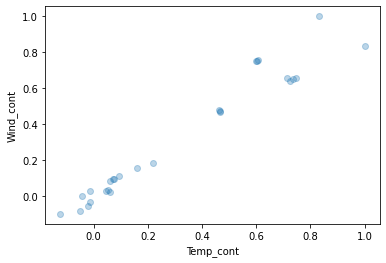

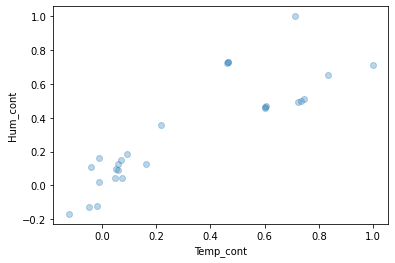

In [ ]:
#initiate the array and dictionary to be used for correlation analysis: 
temp_array = {}
temp_list = []
for line in californiaFire: 
    temp_array[line] = []

rArray(temp_list, temp_array, californiaFire)
def printPlot(t_array):
    print(t_array)
    for i in t_array:
            x = californiaFire[i]
            for j in t_array[i]:
                if i[0] != j[0]:
                    if len(t_array[i]) != 0:
                        y = californiaFire[j]
                        
                        plt.scatter(x, y, alpha=.3)
                        plt.xlabel(i)
                        plt.ylabel(j)
                        plt.show()
                
    
        
printPlot(temp_array) 

Slope =  0.9225148626638641 ; Intercept =  0.02130151705754718 ; Error =  0.06286919679288151


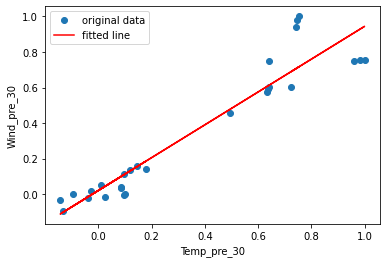

Slope =  0.925460719337372 ; Intercept =  0.021847532443111828 ; Error =  0.06371300814899629


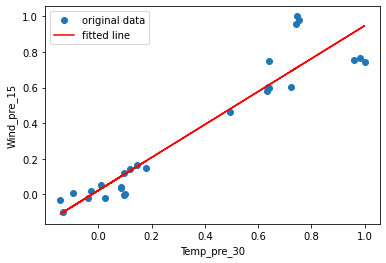

Slope =  0.9239715410063537 ; Intercept =  0.02291032256839448 ; Error =  0.06156895690919596


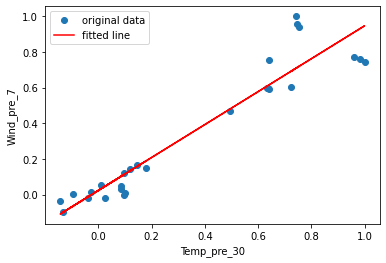

Slope =  0.9193277364776311 ; Intercept =  0.018486595876445633 ; Error =  0.06071068076185793


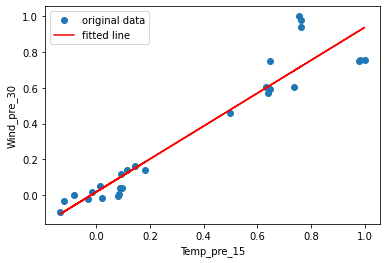

Slope =  0.9225928409551045 ; Intercept =  0.018906770059481548 ; Error =  0.06136371883527208


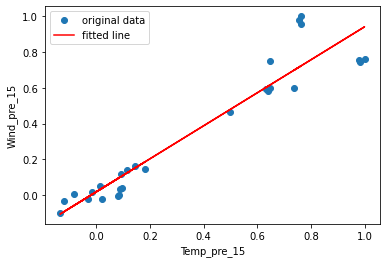

Slope =  0.921188742253294 ; Intercept =  0.01994575006453031 ; Error =  0.05912092633986958


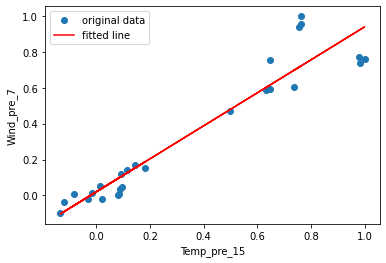

Slope =  0.9261881395412871 ; Intercept =  0.013793182617315658 ; Error =  0.05994980531843728


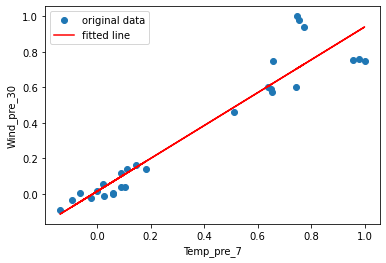

Slope =  0.9296815465136189 ; Intercept =  0.01412385029734009 ; Error =  0.06048529259352915


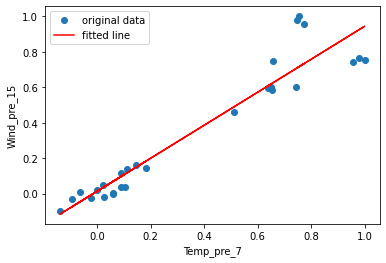

Slope =  0.9286471095547599 ; Intercept =  0.015034229473629868 ; Error =  0.05794354003796969


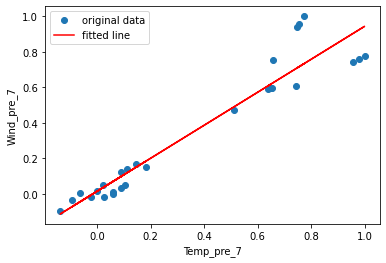

Slope =  0.9874063969054606 ; Intercept =  0.010307065602811083 ; Error =  0.046083813736100716


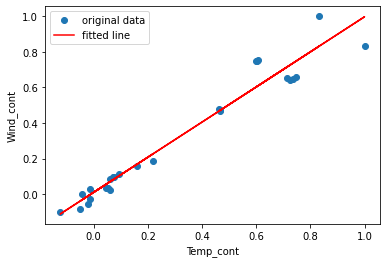

Slope =  0.8050956339222249 ; Intercept =  0.061997356409035254 ; Error =  0.09165815358000998


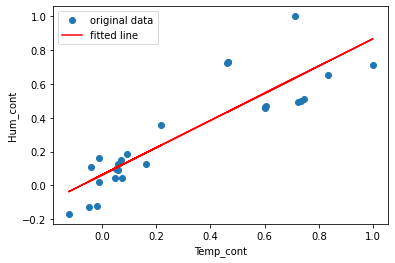

In [ ]:
#Print the linear regression lines on the correlation graphs. 
import numpy as np
from scipy.stats import linregress

temp_array = {}
temp_list = []
for line in californiaFire: 
    temp_array[line] = []

rArray(temp_list, temp_array, californiaFire)
def findSIError(t_array):
    for i in t_array:
        X = californiaFire[i]
        for j in t_array[i]:
            if i[0] != j[0]:
                if len(t_array[i]) != 0:
                    Y = californiaFire[j]
                    mask = ~np.isnan(X) & ~np.isnan(Y)
                    result = linregress(X[mask], Y[mask])
                    print("Slope = ",result.slope, "; Intercept = ", result.intercept, "; Error = ", result.stderr)
                    plt.plot(X, Y, 'o', label='original data')
                    plt.plot(X, result.intercept + result.slope*X, 'r', label='fitted line')
                    plt.legend()
                    plt.xlabel(i)
                    plt.ylabel(j)
                    plt.show()
                    
findSIError(temp_array)